Below we explore what we can find from StockX data on yeezy and off-white nike shoes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%cd /Users/sosuke/Downloads/Stockxproject

/Users/sosuke/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


/Users/sosuke/Downloads/Stockxproject


In [4]:
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx')

In [5]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


First, we create additional columns

Profit for a seller is the sale price minus the retail price times 0.87, since StockX takes 13% of the sale price.

In [6]:
df['profit'] = (df['Sale Price'] - df['Retail Price'])*0.87

We then calculate how many days it has been since the pair was released

In [7]:
df['Days_since_released']=(df['Order Date']-df['Release Date']).dt.days

We then change categorical variables to dummy variables

In [8]:
df = pd.get_dummies(df, columns=['Brand','Sneaker Name','Buyer Region'])

In [9]:
df

,Order Date,Sale Price,Retail Price,Release Date,Shoe Size,profit,Days_since_released,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,...,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
0,2017-09-01,1097.0,220,2016-09-24,11.0,762.99,342,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-09-01,685.0,220,2016-11-23,11.0,404.55,282,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-01,690.0,220,2016-11-23,11.0,408.90,282,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-09-01,1075.0,220,2016-11-23,11.5,743.85,282,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-09-01,828.0,220,2017-02-11,11.0,528.96,202,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,565.0,220,2018-12-26,8.0,300.15,49,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,2019-02-13,598.0,220,2018-12-26,8.5,328.86,49,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,2019-02-13,605.0,220,2018-12-26,5.5,334.95,49,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,2019-02-13,650.0,220,2018-12-26,11.0,374.10,49,1,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([7.6120e+04, 1.9709e+04, 2.8300e+03, 6.4500e+02, 4.1300e+02,
        1.4700e+02, 6.8000e+01, 1.7000e+01, 4.0000e+00, 3.0000e+00]),
 array([ -29.58 ,  309.198,  647.976,  986.754, 1325.532, 1664.31 ,
        2003.088, 2341.866, 2680.644, 3019.422, 3358.2  ]),
 <a list of 10 Patch objects>)

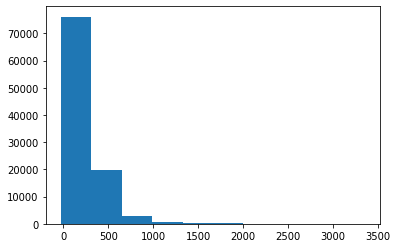

In [10]:
plt.hist(df["profit"])

In [11]:
(df["profit"] < 0).value_counts()

False    99399
True       557
Name: profit, dtype: int64

We can see that there are actually sneakers that sold at loss. We could make this a dummy variable and make it something that we want to predict using classifiers.

Imagine a scenario where you are considering to sell a pair of sneakers and want to know whether the pair you have should be 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b1f58a110>]],
      dtype=object)

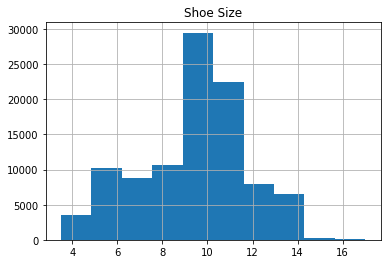

In [12]:
df.hist("Shoe Size")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b1de602d0>]],
      dtype=object)

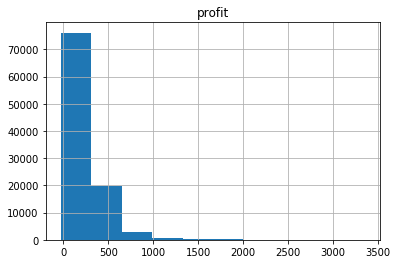

In [13]:
df.hist("profit")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b1de60510>]],
      dtype=object)

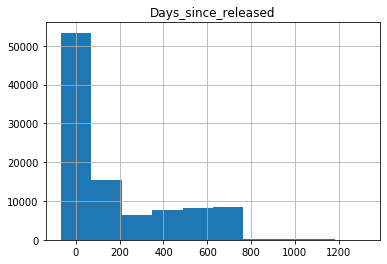

In [14]:
df.hist("Days_since_released")

In [15]:
df['profit_dummy'] =df['profit']>0

In [16]:
(df["profit_dummy"] == 1).value_counts()

True     99070
False      886
Name: profit_dummy, dtype: int64

In [17]:
y = df['profit_dummy']

Drop all unnecessary columns

In [18]:
X = df.drop(['Order Date', 'Sale Price', 'Release Date', 'profit', 'profit_dummy'], axis=1)

In [19]:
# Test train split (80% train 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Run LASSO logistic with cross validation

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
clf = LogisticRegressionCV(cv=5, max_iter=1000, random_state=0).fit(X_train, y_train)

We set maximum iterations to 1000 since it did not converge when it was below 1000.

In [22]:
clf.score(X_test,y_test)

0.9911464585834334

However, notice the inbalance between True and False labels for y.

In [52]:
y_test.value_counts().iloc[0]/len(y_test)

0.9911464585834334

In [51]:
# Accuracy for just False test observations

clf.score(X_test[-y_test], y_test[-y_test])

0.0

This shows that if you predict True (profit) no matter the input, you automatically get this accuracy, which is what the algorithm did above. So let's balance the data first by using SMOTE with Tomek Links.
(SMOTE is an oversampling technique that uses kNN and Tomek Links is an undersampling technique that uses modified CNN - condensed tomek links)

Def. instances a and b define a Tomek Link if: (i) instance a’s nearest neighbor is b, (ii) instance b’s nearest neighbor is a, and (iii) instances a and b belong to different classes.

In [28]:
from imblearn.combine import SMOTETomek

smotet = SMOTETomek(random_state=42)
X_train_b, y_train_b = smotet.fit_resample(X_train,y_train)

y_train_b.value_counts()

True     79222
False    79222
Name: profit_dummy, dtype: int64

Notice that SMOTE with Temok did not really down-sample the number of Trues. Therefore, we try SMOTE with ENN (Edited Nearest Neighbor).

In [32]:
from imblearn.combine import SMOTEENN

smotee = SMOTEENN(random_state=42)
X_train_e, y_train_e = smotee.fit_resample(X_train,y_train)

y_train_e.value_counts()

False    78692
True     75351
Name: profit_dummy, dtype: int64

Almost same results. We will consider simple random under-sampling after using SMOTE for over-sampling.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smotet.fit_resample(X_train,y_train)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_train_smote, y_train_smote)

In [33]:
clf_b = LogisticRegressionCV(cv=5, max_iter=1000, random_state=0).fit(X_train_b, y_train_b)

/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [52]:
# Accuracy for False test observations

clf_b.score(X_test[-y_test], y_test[-y_test])

0.6440677966101694

Notice that it attained the accuracy of 64% even when there are only False test observations, which is a huge improvement from the model using the original dataset.

In [53]:
clf_e = LogisticRegressionCV(cv=5, max_iter=1000, random_state=0).fit(X_train_e, y_train_e)

/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/sosuke/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [55]:
clf_e.score(X_test, y_test)

0.9418767507002801

In [54]:
# Accuracy for False test observations

clf_e.score(X_test[-y_test], y_test[-y_test])

0.6949152542372882

In [37]:
X_train_b['Retail Price']

0         190
1         220
2         220
3         130
4         220
         ... 
158439    220
158440    220
158441    220
158442    220
158443    220
Name: Retail Price, Length: 158444, dtype: int64

In [79]:
clf.coef_

array([[-2.90098741e-02,  4.32456554e-03, -2.37671687e-03,
        -9.43043283e-03,  9.42645417e-03,  2.90505363e-04,
         1.84799526e-04,  3.33649957e-04,  2.76337004e-04,
         2.77541787e-04,  1.16963682e-03,  7.02555867e-03,
         6.50209825e-03,  4.67695577e-04,  3.92075503e-04,
         6.24004829e-04,  1.61481603e-03,  1.19367634e-03,
        -2.64230066e-02,  3.31719296e-03,  4.16002527e-04,
         2.13157992e-02,  2.68156170e-04,  1.11723157e-03,
         8.49114973e-05,  7.99108678e-05,  1.21909633e-04,
         1.29894972e-04,  2.39685283e-06,  8.72930577e-05,
         6.60699687e-05,  5.94589945e-05,  1.68347981e-04,
         6.68776528e-05,  5.11130237e-05,  8.45434158e-05,
         8.35386372e-05,  1.94035007e-04,  1.96112142e-04,
         9.72349430e-04,  2.37452220e-03,  2.00197522e-03,
         2.78090964e-05,  5.94967889e-05,  5.82240452e-05,
         1.34448666e-05,  1.94571196e-04,  2.14850384e-04,
         2.23426587e-04,  7.16764416e-05,  1.77526231e-0

In [54]:
clf.predict([X.iloc[1]])

array([ True])

In [56]:
df.iloc[1]['profit_dummy']

True

In [80]:
X

,Retail Price,Shoe Size,Days_since_released,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,...,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
0,220,11.0,342,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,220,11.0,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220,11.0,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,220,11.5,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,220,11.0,202,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,220,8.0,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,220,8.5,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,220,5.5,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,220,11.0,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1, max_iter=10000)

In [68]:
reg.fit(X,df['profit'])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
reg.coef_

array([-1.36819992e+00,  1.20650030e+00, -1.55891966e-01,  4.65248689e+01,
       -6.07371243e-15,  2.85934099e+02,  2.49007627e+02,  2.04434690e+02,
        2.75333789e+02,  7.26403706e+02,  1.41749283e+02, -2.54587232e+02,
       -2.71518501e+02,  0.00000000e+00,  0.00000000e+00,  2.49271895e+02,
        1.42260478e+02,  7.15601769e+01, -2.86637233e+02, -2.28205653e+02,
       -3.82922673e+02, -2.12784448e+02,  9.66108613e+02,  1.56131182e+02,
        9.80566517e+02,  2.28385528e+01, -1.39496082e+02, -2.44501603e+02,
        0.00000000e+00,  2.29608437e+01, -1.08369657e+02, -1.24136738e+02,
        0.00000000e+00, -0.00000000e+00,  1.48105785e+02,  4.58023609e+01,
        4.80260776e+02,  3.49494499e+01, -3.75522727e+01,  1.93265442e+02,
       -2.45341371e+01,  0.00000000e+00,  0.00000000e+00, -7.83139060e+01,
       -1.45029534e+02,  4.33988329e+01, -1.14014013e+02, -2.51542057e+02,
       -3.07911496e+02, -9.28321857e+01, -3.02525533e+02, -3.50483112e+02,
       -3.74800376e+02, -